In [2]:
import sqlite3
import matplotlib.pyplot as plt

conn = sqlite3.connect("students.sqlite3")
conn.row_factory = sqlite3.Row
c = conn.cursor()

ავშირი დავამყარეთ ბაზასთან და დავაყენეთ Row Factory, რათა მონაცემების წაკითხვა სვეტების სახელებით შეგვეძლოს.

In [3]:
age = 17

def age_of_student(age):
    return c.execute('SELECT * FROM students WHERE age >= ?', (age,)).fetchall()

result = age_of_student(age)
for row in result:
    print(row['name'], row['gender'])

natiaa Other
Student_2 Male
Student_3 Other
Student_4 Other
Student_6 Male
Student_9 Other
Student_10 Other
Student_16 Male
Student_20 Female
Student_21 Male
Student_23 Female
Student_29 Other
Student_32 Other
Student_39 Male
Student_40 Other
Student_42 Other
Student_43 Other
Student_49 Female
Student_55 Female
Student_60 Other
Student_61 Female
Student_63 Female
Student_64 Female
Student_66 Female
Student_73 Female
Student_76 Female
Student_77 Female
Student_81 Other
Student_86 Female
Student_90 Male
Student_91 Male
Student_100 Male
Student_102 Other
Student_106 Other
Student_107 Male
Student_108 Other
Student_113 Male
Student_114 Other
Student_118 Other
Student_119 Other
Student_120 Female
Student_123 Female
Student_124 Other
Student_125 Other
Student_127 Other
Student_128 Male
Student_132 Male
Student_133 Male
Student_140 Male
Student_141 Other
Student_148 Other
Student_154 Other
Student_155 Male
Student_157 Other
Student_161 Other
Student_164 Female
Student_165 Female
Student_166 M

განვსაზღვრეთ მინიმალური ასაკი და შევქმენით ფუნქციას,რომელიც აბრუნებს ყველა იმ სტუდენტს, ვისი ასაკიც მითითებულ მნიშვნელობაზე მეტია ან ტოლია. ვიძახებთ ფუნქციას და ვბეჭდავთ სტუდენტების სახელებსა და სქესს ცხრილიდან.

In [4]:
id = input('Enter the id: ')
name = input('Enter the name: ')
c.execute("INSERT INTO students (student_id, name) VALUES (?, ?)", (id, name))
conn.commit()


Enter the id:  st1
Enter the name:  natia karosanidze


მონაცემების დასამატებლად მომხმარებლისგან ვიღებთ სტუდენტის ID-ს და სახელს და ვამატებთ students ცხრილში.

In [5]:
print("შეიყვანეთ იმ სტუდენტის id, რომლის სახელი გინდათ შეცვალოთ")
id = input("შეიყვანეთ id: ")
name = input('შეიყვანეთ სახელი: ')
c.execute("UPDATE students SET name = ? WHERE student_id = ?", (name, id))
conn.commit()

შეიყვანეთ იმ სტუდენტის id, რომლის სახელი გინდათ შეცვალოთ


შეიყვანეთ id:  S1
შეიყვანეთ სახელი:  natia karosanidze


მონაცემის განახლებისთვის მომხმარებელი შეიყვანს იმ სტუდენტის ID-ს, რომლის სახელი უნდა შეიცვალოს, და მიუთითებს ახალ სახელს. ამის შემდეგ მონაცემი ცხრილში განახლდება.

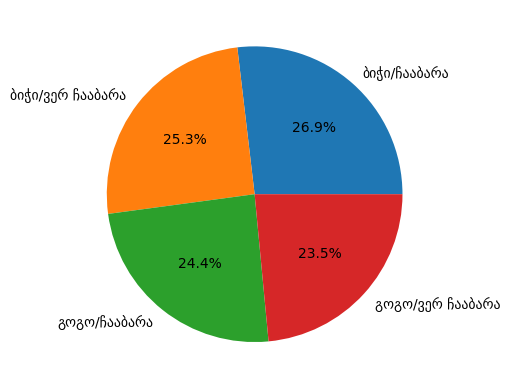

In [6]:
def stdnt_results(sex, resulty):
    return c.execute(
        "SELECT count(*) FROM students WHERE gender = ? AND final_result = ?",
        (sex, resulty)
    ).fetchone()[0]

male_pass = stdnt_results("Male", "Pass")
female_pass = stdnt_results("Female", "Pass")
male_fail = stdnt_results("Male", "Fail")
female_fail = stdnt_results("Female", "Fail")

labels = ["ბიჭი/ჩააბარა", "ბიჭი/ვერ ჩააბარა", "გოგო/ჩააბარა", "გოგო/ვერ ჩააბარა"]
sizes = [male_pass, male_fail, female_pass, female_fail]

if sum(sizes) > 0:
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%.1f%%')
    plt.show()
else:
    print("მონაცემები ვერ მოიძებნა pie chart-ისთვის.")

წრიული დიაგრამა (Pie Chart): ვქმნით ფუნქციას, რომელიც ითვლის სტუდენტების რაოდენობას სქესისა და ჩაბარების შედეგის მიხედვით. შემდეგ ვაგებთ pie chart-ს, თუ მონაცემები არსებობს.

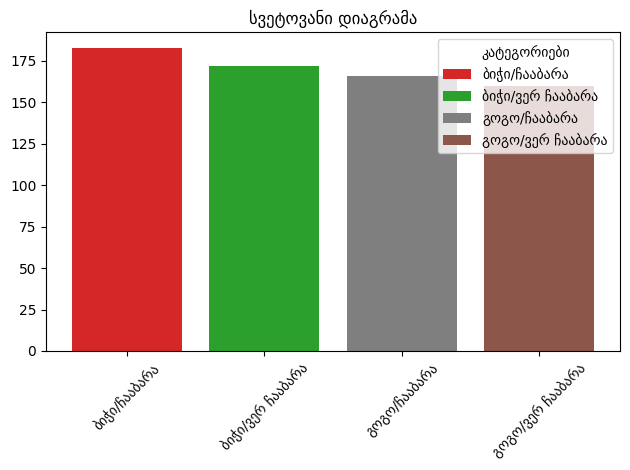

In [7]:
bar_colors = ['tab:red', 'tab:green', 'tab:grey', 'tab:brown']

for i in range(len(labels)):
    plt.bar(labels[i], sizes[i], color=bar_colors[i], label=labels[i])

plt.title("სვეტოვანი დიაგრამა")
plt.xticks(rotation=45)
plt.legend(title='კატეგორიები')
plt.tight_layout()
plt.show()

სვეტოვანი დიაგრამა (Bar Chart): ვამზადებთ იმავე მონაცემებს bar chart-ისთვის და ვხატავთ ფერად სვეტებს,სადაც თითო სვეტი სხვადასხვა კატეგორიას წარმოადგენს.

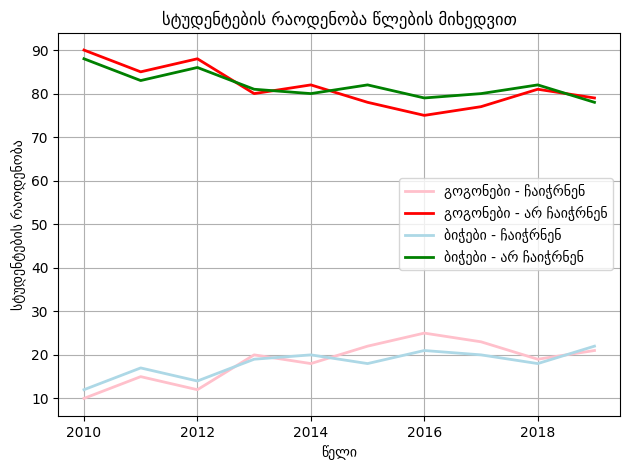

In [8]:
years = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
girls_failed = [10, 15, 12, 20, 18, 22, 25, 23, 19, 21]
girls_passed = [90, 85, 88, 80, 82, 78, 75, 77, 81, 79]
boys_failed = [12, 17, 14, 19, 20, 18, 21, 20, 18, 22]
boys_passed = [88, 83, 86, 81, 80, 82, 79, 80, 82, 78]

plt.plot(years, girls_failed, label="გოგონები - ჩაიჭრნენ", color="pink", linewidth=2)
plt.plot(years, girls_passed, label="გოგონები - არ ჩაიჭრნენ", color="red", linewidth=2)
plt.plot(years, boys_failed, label="ბიჭები - ჩაიჭრნენ", color="lightblue", linewidth=2)
plt.plot(years, boys_passed, label="ბიჭები - არ ჩაიჭრნენ", color="green", linewidth=2)

plt.title("სტუდენტების რაოდენობა წლების მიხედვით")
plt.xlabel("წელი")
plt.ylabel("სტუდენტების რაოდენობა")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

conn.close()

ხაზოვანი დიაგრამა (Line Chart): წლების მიხედვით ვხატავთ ოთხ ხაზს, რომლებიც აჩვენებს გოგონებისა და ბიჭების ჩაჭრილი და ჩაბარებული სტუდენტების რაოდენობას. და ბოლოს ვხურავთ ბაზასთან კავშირს.